# Test for model testing
# Experiment 1
initial test on Movement

In [2]:
import random
import pathlib
import itertools
import collections
import pickle
import os
import cv2
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load in the classifications

In [2]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
pathMovement = {}
for word in os.listdir(saveLocation):
    if word == 'AREA-2H':
        print(word)
    pathMovement[word] = None
    
f = open("keyBinds.txt", "r")
line = f.readline()
i= 0
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            pathMovement[line.split("_|_")[0]] = None
        else:
            pathMovement[line.split("_|_")[0]] = line.split("_|_")[1]
    except:
        j = 1
    line = f.readline()
f.close()
pathMovement, i

AREA-2H


({'ABOUT1': 'Vertical Circular\n',
  'ABOUT2': 'Vertical Circular\n',
  'ABOUT2(7)': 'Vertical Circular\n',
  'ABOUT2(B)': None,
  'ABOUT2(FALSE-START)': 'Unknown\n',
  'ACCEPT': 'Towards\n',
  'ACCOMMODATION-2H': 'Back and Forth\n',
  'ACCURATE': 'Up and Down\n',
  'ACHIEVE': 'Away\n',
  'ACTIVITY-THERE': 'Sideways\n',
  'ADULT': 'Horizontal Circular\n',
  'AFRAID': 'Back and Forth\n',
  'AFTERNOON': 'Local Movement\n',
  'AFTERNOON3': 'Towards\n',
  'AFTERNOON4': 'Towards\n',
  'AGAIN': 'Down\n',
  'AGAIN(8)': None,
  'AGAIN-2H': 'Local Movement\n',
  'AGAIN-AND-AGAIN': 'Up and Down\n',
  'AGES': 'Horizontal Circular\n',
  'AGREE': 'Sideways\n',
  'AIM': 'Unknown\n',
  'ALIVE': 'Towards\n',
  'ALL': 'Horizontal Circular\n',
  'ALL-2H': 'Away\n',
  'ALL-DAY': 'Up\n',
  'ALL-DAY-2H': 'Horizontal Circular\n',
  'ALL-DAY-LONG': 'Vertical Circular\n',
  'ALLOW': 'Local Movement\n',
  'ALMOST': 'Unknown\n',
  'ALMOST(FLATGO)': None,
  'ALMOST-2H': 'Unknown\n',
  'ALRIGHT': 'Unknown\n',
  '

## Primary Movement KeyBind.txt -> int

In [3]:
label_keys = {"Up\n":0, "Down\n":1, "Up and Down\n":2, "Sideways\n":3, 
              "Side to Side\n":4, "Away\n":5, "Towards\n":6, 
              "Back and Forth\n":7, "Horizontal Circular\n":8, 
              "Vertical Circular\n":9, "Local Movement\n":10, "Unknown\n": 11,}
label_keys

{'Up\n': 0,
 'Down\n': 1,
 'Up and Down\n': 2,
 'Sideways\n': 3,
 'Side to Side\n': 4,
 'Away\n': 5,
 'Towards\n': 6,
 'Back and Forth\n': 7,
 'Horizontal Circular\n': 8,
 'Vertical Circular\n': 9,
 'Local Movement\n': 10,
 'Unknown\n': 11}

# Load in the imputed dataset

In [7]:
X = []
Y = []
title = []
videoWord = []
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if i % 2:
        continue
    coorLoad = np.loadtxt(coorDataLocation + data)
    coorShape= np.loadtxt(coorDataLocation + dirData[i + 1])
    
    try:
        coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    except:
        print(data, dirData[i + 1], coorLoad.shape, coorShape.shape)
    title.append(data)
    X.append(coorLoad)
len(X)

14058

#### Remove the .npy and replace .mp4

In [8]:
newTitle = []

for name in title:
    newName = name[:-4] + '.mp4'
    newTitle.append(newName)
title = np.array(newTitle)
len(title)

14058

#### Save OriginalX values

In [9]:
originalX = X
originalTitle = title
len(originalX)

14058

#### In case error ocured reload in x

In [10]:
X = originalX
title = originalTitle
len(X)

14058

## Load in usability

In [11]:
usability = {}

f = open("useability.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            usability[line.split("_|_")[0]] = None
        else:
            usability[line.split("_|_")[0]] = int(line.split("_|_")[1])
    except:
        if line != '\n':
            print(line)
    line = f.readline()
f.close()

numUsablility = {0:0,1:0,2:0,3:0,4:0}
for key, value in usability.items():
    numUsablility[value] += 1
len(usability), numUsablility

(16784, {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333})

# Load in the classifications

In [12]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
pathMovement = {}
for word in os.listdir(saveLocation):
    pathMovement[word] = None
    
f = open("keyBinds.txt", "r")
line = f.readline()
i= 0
j = 0
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            pathMovement[line.split("_|_")[0].upper()] = None
        else:
            pathMovement[line.split("_|_")[0].upper()] = line.split("_|_")[1]
    except:
        i += 1
    line = f.readline()
f.close()
pathMovement

{'ABOUT1': 'Vertical Circular\n',
 'ABOUT2': 'Vertical Circular\n',
 'ABOUT2(7)': 'Vertical Circular\n',
 'ABOUT2(B)': None,
 'ABOUT2(FALSE-START)': 'Unknown\n',
 'ACCEPT': 'Towards\n',
 'ACCOMMODATION-2H': 'Back and Forth\n',
 'ACCURATE': 'Up and Down\n',
 'ACHIEVE': 'Away\n',
 'ACTIVITY-THERE': 'Sideways\n',
 'ADULT': 'Horizontal Circular\n',
 'AFRAID': 'Back and Forth\n',
 'AFTERNOON': 'Local Movement\n',
 'AFTERNOON3': 'Towards\n',
 'AFTERNOON4': 'Towards\n',
 'AGAIN': 'Down\n',
 'AGAIN(8)': None,
 'AGAIN-2H': 'Local Movement\n',
 'AGAIN-AND-AGAIN': 'Up and Down\n',
 'AGES': 'Horizontal Circular\n',
 'AGREE': 'Sideways\n',
 'AIM': 'Unknown\n',
 'ALIVE': 'Towards\n',
 'ALL': 'Horizontal Circular\n',
 'ALL-2H': 'Away\n',
 'ALL-DAY': 'Up\n',
 'ALL-DAY-2H': 'Horizontal Circular\n',
 'ALL-DAY-LONG': 'Vertical Circular\n',
 'ALLOW': 'Local Movement\n',
 'ALMOST': 'Unknown\n',
 'ALMOST(FLATGO)': None,
 'ALMOST-2H': 'Unknown\n',
 'ALRIGHT': 'Unknown\n',
 'ALRIGHT-2H': 'Unknown\n',
 'ALRIGH

## Primary Movement KeyBind.txt -> int

In [13]:
label_keys = {"Up\n":0, "Down\n":1, "Up and Down\n":2, "Sideways\n":3, 
              "Side to Side\n":4, "Away\n":5, "Towards\n":6, 
              "Back and Forth\n":7, "Horizontal Circular\n":8, 
              "Vertical Circular\n":9, "Local Movement\n":10, "Unknown\n": 11,}
label_keys

{'Up\n': 0,
 'Down\n': 1,
 'Up and Down\n': 2,
 'Sideways\n': 3,
 'Side to Side\n': 4,
 'Away\n': 5,
 'Towards\n': 6,
 'Back and Forth\n': 7,
 'Horizontal Circular\n': 8,
 'Vertical Circular\n': 9,
 'Local Movement\n': 10,
 'Unknown\n': 11}

# Assign each data point to a classification
## Each of these will be classified to X and Y

In [14]:
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
videoWord = []
numBad = 0
numNone = 0
for i, data in enumerate(dirData):
    data = data.upper()
    if i % 2:
        continue
    try:
        movement = pathMovement[data.split("_")[0]]
        videoWord.append(label_keys[movement])
    except:
        if pathMovement[data.split("_")[0]] is None:
            numNone += 1
        numBad += 1
        print(data)
        videoWord.append(99) 
numBad, numNone, len(dirData)

BEDFRAME_BCHA2C7A_2180_4030.NPY
BEFORE2_BFPB1C2A_34436_34766.NPY
BOTTOM2_BSSA1C2B_70870_71770.NPY
CALL_BFPB1C2A_126318_126648.NPY
DAYBREAK_BCHA2C7A_39940_41160.NPY
DON'T1-2H_BSSA1C2B_31650_32140.NPY
FIND1_SATA2C7A_43760_44070.NPY
FUNNY_AMMA1C2A_53334_53714.NPY
HAVE-2H_AMGA1C2A_25120_25300.NPY
HAVE-2H_MTFB3C9A_82080_82340.NPY
HAVE-2H_PDSA2C7A_73770_73990.NPY
HAVE-2H_SBS1A3C7A_2140_3080.NPY
HAVE-2H_SGMB2C7A_102690_102810.NPY
HAVE-2H_SPKA1C2A_22050_22300.NPY
HAVE-2H_SPKA3C9A_49165_49465.NPY
HAVE-2H_SSSB1C2A_30329_30660.NPY
HAVE-2H_SSSB1C2A_9640_9930.NPY
HAVE-NONE-OF-2H_MKB2A1C2A_62720_63040.NPY
HAVE-NONE_PCNB2C7A_27370_27710.NPY
HAVE_AAM1A1C2A_3480_3930.NPY
HAVE_AAM1A1C2A_74455_74595.NPY
HAVE_AAM1A1C2A_81965_82325.NPY
HAVE_AAM1A1C2A_85525_85855.NPY
HAVE_AASB1C2A_13818_14030.NPY
HAVE_ACAA1C2A_20760_20980.NPY
HAVE_ACAA1C2A_22020_22160.NPY
HAVE_ACAA2C7A_4920_5280.NPY
HAVE_ACAA2C7A_74299_74489.NPY
HAVE_ACAA2C7A_79719_79909.NPY
HAVE_ACAA2C7A_82559_82699.NPY
HAVE_ADCB2C6III_70390_70610.NPY
HAVE

(6299, 6299, 28116)

## Append X values with a Y data label

In [15]:
newX = []
newTitle = []
Y = []
print(len(X), len(videoWord))
for i, y in enumerate(videoWord):
    # 99 was assigned if an error occured when importing and 11 is for unknown datalabels
    if y != 99 and y != 11:
        newX.append(X[i])
        newTitle.append(title[i])
        Y.append(y)
X = newX
title = np.array(newTitle)
print(len(X), len(title))

14058 14058
6410 6410


## Remove X and Y that are low usability

In [16]:
print(len(X),len(Y))
newX = []
newY = []
for i in range(len(X)):
    if usability[title[i]] >= 3:
        newX.append(X[i])
        newY.append(Y[i])
X = np.array(newX)
Y = np.array(newY)
print(len(X),len(Y))

6410 6410
3258 3258


## check shape of data

In [17]:
newX = []
newY = []
for i in range(len(X)):
    try:
        if X[i].shape[1] == 33 or X[i].shape[2] == 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        continue
X = np.array(newX)
Y = np.array(newY)

In [18]:
print(len(X), len(Y), len(originalX))
print(X.shape)

3258 3258 14058
(3258, 40, 33, 3)


# Reshape insto 1d shape

In [19]:
newX = []
for i in range(len(X)):
    newInfo = []
    for frame in X[i]:
        for joint in frame:
            for coor in joint:
                newInfo.append(coor)
    newX.append(newInfo)
X = np.array(newX)
print(X.shape)

(3258, 3960)


## Create Training Splits

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [51]:
X_train.shape

(2182, 3960)

# Save Data

In [ ]:
np.savetxt("experiment2/X_train.npy", X_train)
np.savetxt("experiment2/X_test.npy", X_test)
np.savetxt("experiment2/y_train.npy", y_train)
np.savetxt("experiment2/y_test.npy", y_test)

# Save the array

In [47]:
np.savetxt("experiment1/X_train.npy", X_train)
np.savetxt("experiment1/X_test.npy", X_test)
np.savetxt("experiment1/y_train.npy", y_train)
np.savetxt("experiment1/y_test.npy", y_test)

In [3]:
X_train = np.loadtxt("experiment1/X_train.npy")
X_test = np.loadtxt("experiment1/X_test.npy")
y_train = np.loadtxt("experiment1/y_train.npy")
y_test = np.loadtxt("experiment1/y_test.npy")

# Data analysis

In [4]:
import pandas as pd
unique_classes, counts = np.unique(y_train, return_counts=True)

invs_label_key = {label_keys[key]: key for key in label_keys.keys()}
class_counts_df = pd.DataFrame({'Class': [invs_label_key[i][:-1] for i in unique_classes], 'Count': counts})

for label, count in zip(unique_classes, counts):
    print(f"Class {invs_label_key[label][:-1]}: {count} samples")
class_counts_df

NameError: name 'label_keys' is not defined

## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# data to manipulate
ldas = []
for solver in ['svd', 'lsqr']:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(X_train, y_train)
    ldas.append(lda)
    print('\n', solver)
    # Error calculation
    print("training acuracy: ", lda.score(X_train, y_train))
    print("validation acuracy: ", lda.score(X_test, y_test))
    print("training error: ", 1 - lda.score(X_train, y_train))
    print("validation error: ", 1 - lda.score(X_test, y_test))


 svd
training acuracy:  0.9857928505957837
validation acuracy:  0.15892193308550187
training error:  0.014207149404216302
validation error:  0.8410780669144982

 lsqr
training acuracy:  0.033455545371219066
validation acuracy:  0.026022304832713755
training error:  0.9665444546287809
validation error:  0.9739776951672863


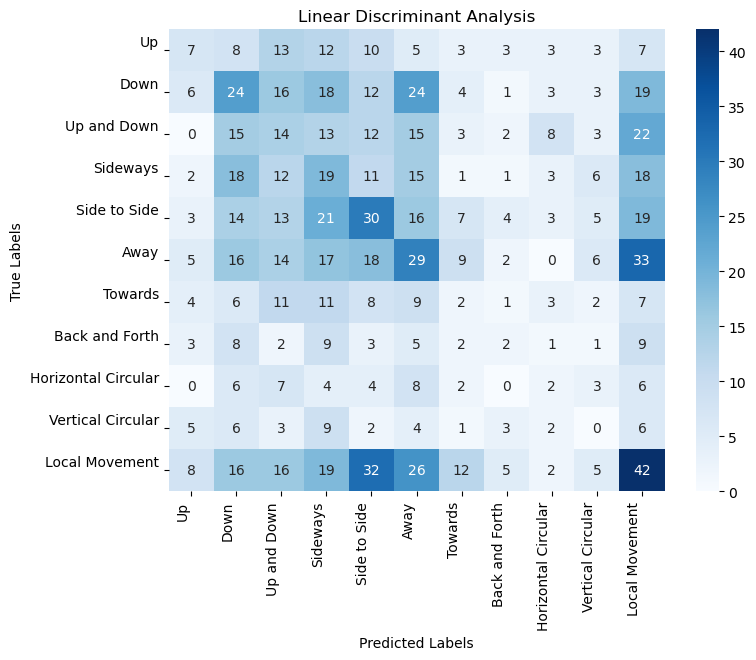

In [44]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

y_pred = ldas[0].predict(X_test)
cm = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Quadratic Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
# Error calculation
print("training acuracy: ", qda.score(X_train, y_train))
print("validation acuracy: ", qda.score(X_test, y_test))
print("training error: ", 1 - qda.score(X_train, y_train))
print("validation error: ", 1 - qda.score(X_test, y_test))

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


training acuracy:  1.0
validation acuracy:  0.13940520446096655
training error:  0.0
validation error:  0.8605947955390334


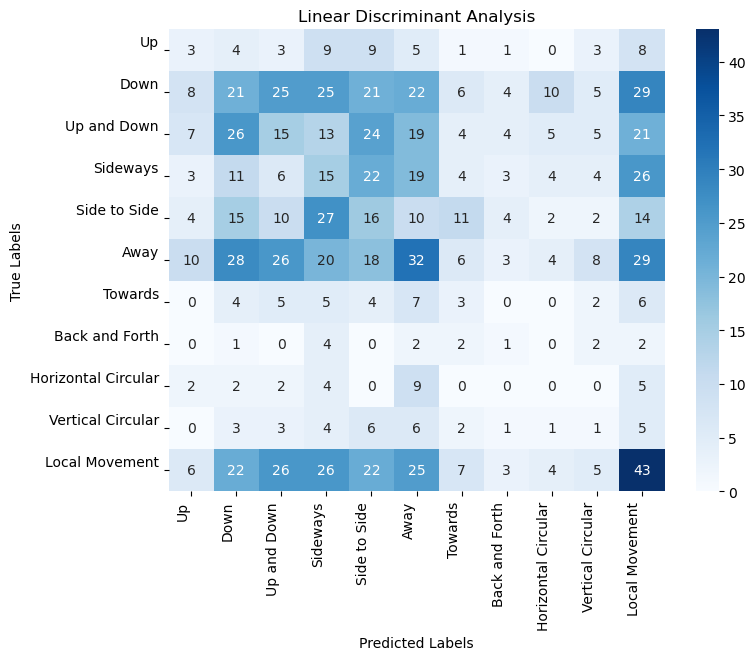

In [ ]:
from sklearn import metrics
import seaborn as sns
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

y_pred = qda.predict(X_test)
cm = metrics.confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Linear Discriminant Analysis')
plt.show()

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("training acuracy: ", gnb.score(X_train, y_train))
print("validation acuracy: ", gnb.score(X_test, y_test))
print("training error: ", 1 - gnb.score(X_train, y_train))
print("validation error: ", 1 - gnb.score(X_test, y_test))


training acuracy:  0.18056828597616864
validation acuracy:  0.1449814126394052
training error:  0.8194317140238314
validation error:  0.8550185873605948


## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bottom = 0
top = 31
step = 5
predictClass = []
kNeighborsPredictions = []
for weight in ['uniform', 'distance']:
    for i in range(bottom, top,step):
        if i == 0:
            clf = KNeighborsClassifier(n_neighbors=1, weights=weight)
        else:
            clf = KNeighborsClassifier(n_neighbors=i, weights=weight)
        clf.fit(X_train, y_train)
        kNeighborsPredictions.append(clf)
    for neigh in kNeighborsPredictions:
        print(neigh)
        # Error calculation
        print("training acuracy: ", neigh.score(X_train, y_train))
        print("validation acuracy: ", neigh.score(X_test, y_test))
        print("training error: ", 1 - neigh.score(X_train, y_train))
        print("validation error: ", 1- neigh.score(X_test, y_test))
        print("\n")



KNeighborsClassifier(n_neighbors=1)
training acuracy:  1.0
validation acuracy:  0.21189591078066913
training error:  0.0
validation error:  0.7881040892193308


KNeighborsClassifier()
training acuracy:  0.45875343721356554
validation acuracy:  0.19423791821561337
training error:  0.5412465627864345
validation error:  0.8057620817843867


KNeighborsClassifier(n_neighbors=10)
training acuracy:  0.3611365719523373
validation acuracy:  0.19981412639405205
training error:  0.6388634280476627
validation error:  0.800185873605948


KNeighborsClassifier(n_neighbors=15)
training acuracy:  0.32538955087076077
validation acuracy:  0.2100371747211896
training error:  0.6746104491292393
validation error:  0.7899628252788105


KNeighborsClassifier(n_neighbors=20)
training acuracy:  0.29605866177818513
validation acuracy:  0.2137546468401487
training error:  0.7039413382218149
validation error:  0.7862453531598513


KNeighborsClassifier(n_neighbors=25)
training acuracy:  0.2827681026581118
validation

In [ ]:
from sklearn import metrics
inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

color = 'white'
matrix = metrics.plot_confusion_matrix(deTree, X_train, y_train)
matrix.ax_.set_title('Confusion Matrix', color='Black')
plt.xlabel('Predicted Label', color='Black')
plt.ylabel('True Label', color='Black')
matrix.ax_.xaxis.set_ticklabels(label)
matrix.ax_.yaxis.set_ticklabels(label)
# plt.gcf().axes[0].tick_params(colors='Black')
# plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

## Decision Tree Classifier
A decision tree classifier.

In [7]:
from sklearn.tree import DecisionTreeClassifier
for criteria in ["gini", "entropy", "log_loss"]:
    for splitter in ["best", "random"]:
        deTree = DecisionTreeClassifier(criterion=criteria, splitter=splitter, max_depth=10, min_samples_split=10)
        print('criteria: ', criteria, 'splitter: ', splitter)
        deTree.fit(X_train, y_train)

        print("training acuracy: ", deTree.score(X_train, y_train))
        print("validation acuracy: ", deTree.score(X_test, y_test))


criteria:  gini splitter:  best
training acuracy:  0.5494958753437214
validation acuracy:  0.20446096654275092
criteria:  gini splitter:  random
training acuracy:  0.5013748854262144
validation acuracy:  0.21561338289962825
criteria:  entropy splitter:  best
training acuracy:  0.6668194317140238
validation acuracy:  0.1979553903345725
criteria:  entropy splitter:  random
training acuracy:  0.5701191567369386
validation acuracy:  0.2100371747211896
criteria:  log_loss splitter:  best
training acuracy:  0.6672777268560953
validation acuracy:  0.19237918215613384
criteria:  log_loss splitter:  random
training acuracy:  0.571494042163153
validation acuracy:  0.20446096654275092


## RandomForestClassifier
A random forest classifier.

In [62]:
from sklearn.ensemble import RandomForestClassifier

for criteria in ["gini", "entropy", "log_loss"]:
    rfc = RandomForestClassifier(criterion=criteria, min_samples_split=10, max_depth=8)
    rfc.fit(X_train, y_train)
    print(rfc, criteria)
    print("training acuracy: ", rfc.score(X_train, y_train))
    print("validation acuracy: ", rfc.score(X_test, y_test))

RandomForestClassifier(max_depth=8, min_samples_split=10) gini
training acuracy:  0.6819431714023831
validation acuracy:  0.30111524163568776
training error:  0.31805682859761686
validation error:  0.6988847583643123
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10) entropy
training acuracy:  0.812557286892759
validation acuracy:  0.30111524163568776
training error:  0.18744271310724103
validation error:  0.6988847583643123
RandomForestClassifier(criterion='log_loss', max_depth=8, min_samples_split=10) log_loss
training acuracy:  0.8244729605866178
validation acuracy:  0.30390334572490707
training error:  0.1755270394133822
validation error:  0.6960966542750929


In [ ]:
experiment = 1
experimentData = ['experiment1', 'experiment2', 'experiment3', 'experiment4', 'experiment5', 'experiment6', 'experiment7']
folder = experimentData[experiment - 1]
# Save Data
X_train = np.loadtxt(folder + "/X_train.npy")
X_test = np.loadtxt(folder + "/X_test.npy")
y_train = np.loadtxt(folder + "/y_train.npy")
y_test = np.loadtxt(folder + "/y_test.npy")

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# data to manipulate
ldas = []
for solver in ['svd', 'lsqr']:
    lda = LinearDiscriminantAnalysis(solver=solver)
    lda.fit(X_train, y_train)
    ldas.append(lda)
    print('\n', solver)
    # Error calculation
    print("training acuracy: ", lda.score(X_train, y_train))
    print("validation acuracy: ", lda.score(X_test, y_test))
    print("training error: ", 1 - lda.score(X_train, y_train))
    print("validation error: ", 1 - lda.score(X_test, y_test))


 svd
training acuracy:  0.9857928505957837
validation acuracy:  0.15892193308550187
training error:  0.014207149404216302
validation error:  0.8410780669144982

 lsqr
training acuracy:  0.033455545371219066
validation acuracy:  0.026022304832713755
training error:  0.9665444546287809
validation error:  0.9739776951672863


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
# Error calculation
print("training acuracy: ", qda.score(X_train, y_train))
print("validation acuracy: ", qda.score(X_test, y_test))
print("training error: ", 1 - qda.score(X_train, y_train))
print("validation error: ", 1 - qda.score(X_test, y_test))

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


training acuracy:  1.0
validation acuracy:  0.13940520446096655
training error:  0.0
validation error:  0.8605947955390334


In [22]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
pd.DataFrame(["{:.1f}%".format(model.score(X_train, y_train)* 100), "{:.1f}%".format(model.score(X_test, y_test)* 100)])

KeyError: "None of ['A'] are in the columns"

In [16]:
from sklearn.neighbors import KNeighborsClassifier
bottom = 0
top = 31
step = 5
values = []
for weight in ['uniform', 'distance']:
    row = []
    for i in range(bottom, top,step):
        if i == 0:
            model = KNeighborsClassifier(n_neighbors=1, weights=weight)
        else:
            model = KNeighborsClassifier(n_neighbors=i, weights=weight)
        model.fit(X_train, y_train)
        print(model)
        model.fit(X_train, y_train)
        row.append("{:.1f}%".format(model.score(X_train, y_train)* 100))
        row.append("{:.1f}%".format(model.score(X_test, y_test)* 100))
    values.append(row)
df = pd.DataFrame(values)
df

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=20)
KNeighborsClassifier(n_neighbors=25)
KNeighborsClassifier(n_neighbors=30)
KNeighborsClassifier(n_neighbors=1, weights='distance')
KNeighborsClassifier(weights='distance')
KNeighborsClassifier(n_neighbors=10, weights='distance')
KNeighborsClassifier(n_neighbors=15, weights='distance')
KNeighborsClassifier(n_neighbors=20, weights='distance')
KNeighborsClassifier(n_neighbors=25, weights='distance')
KNeighborsClassifier(n_neighbors=30, weights='distance')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,100.0,21.2,45.9,19.4,36.1,20.0,32.5,21.0,29.6,21.4,28.3,21.4,27.3,21.0
1,100.0,21.2,100.0,20.9,100.0,21.5,100.0,21.0,100.0,21.8,100.0,21.3,100.0,21.9


In [12]:
from sklearn.tree import DecisionTreeClassifier
values = []
for criteria in ["gini", "entropy", "log_loss"]:
    for splitter in ["best", "random"]:
        model = DecisionTreeClassifier(criterion=criteria, splitter=splitter, max_depth=10, min_samples_split=10)
        print(model)
        model.fit(X_train, y_train)
        values.append(["{:.1f}%".format(model.score(X_train, y_train)* 100), "{:.1f}%".format(model.score(X_test, y_test)* 100)])

df = pd.DataFrame(values)
df

DecisionTreeClassifier(max_depth=10, min_samples_split=10)
DecisionTreeClassifier(max_depth=10, min_samples_split=10, splitter='random')
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       splitter='random')
DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_split=10)
DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_split=10,
                       splitter='random')


,0,1
0,55.0,20.4
1,50.7,21.8
2,67.0,19.1
3,56.0,19.2
4,66.7,20.0
5,52.8,20.1


In [11]:
from sklearn.ensemble import RandomForestClassifier
values = []
for criteria in ["gini", "entropy", "log_loss"]:
    model = RandomForestClassifier(criterion=criteria, min_samples_split=10, max_depth=8)
    print(model)
    model.fit(X_train, y_train)
    values.append(["{:.1f}%".format(model.score(X_train, y_train)* 100), "{:.1f}%".format(model.score(X_test, y_test)* 100)])

df = pd.DataFrame(values)
df

criteria:  gini splitter:  random
criteria:  entropy splitter:  random
criteria:  log_loss splitter:  random


,0,1
0,67.7,31.3
1,81.6,31.5
2,82.2,30.1


# Save Model

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
with open('./experiment1/LDA.pkl', 'wb') as file:
    pickle.dump(lda, file)

In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
with open('./experiment1/QDA.pkl', 'wb') as file:
    pickle.dump(qda, file)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
with open('./experiment1/GNB.pkl', 'wb') as file:
    pickle.dump(gnb, file)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
with open('./experiment1/KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=8, min_samples_split=10)
dtc.fit(X_train, y_train)
with open('./experiment1/DTC.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='log_loss', min_samples_split=10, max_depth=8)
rfc.fit(X_train, y_train)
with open('./experiment1/RFC.pkl', 'wb') as file:
    pickle.dump(rfc, file)